In [15]:
import os
import sys
import time
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import umap
import glob
import PyPDF2 
from natsort import natsorted 
import pickle


import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import random
import math

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from matplotlib.colors import Normalize
from matplotlib import cm

# Local application/library specific imports
sys.path.append('/net/seq/data2/projects/aabisheva/Encode/my_ipynb/Vocabulary')
import OONMF
import OONMFhelpers
from OONMFhelpers import get_barsortorder

In [11]:
# Loading of matrices 4551*760k and 3883*760k  not downsampled
bin_matrix_4501_760 =  np.load("/net/seq/data2/projects/aabisheva/Encode/input_matrixes/filtered.full_bin_760_peaks.npy")
bin_matrix_3883_760 =  np.load("/net/seq/data2/projects/aabisheva/Encode/input_matrixes/filtered.3883_bin_760k_peaks.npy")

prefix_range = ["bin_4501_index_not_downs_760_peaks", "bin_3883_index_not_downs_760_peaks"]
base_matrix_set = [ bin_matrix_4501_760, bin_matrix_3883_760]

In [17]:
# Specifing input and output folders
dir_path_pipeline = "/net/seq/data2/projects/aabisheva/Encode/nextflow_results/nmf_results/"
dir_path_figures = "/net/seq/data2/projects/aabisheva/Encode/nextflow_results/figures/"
#save_dir_reprojection = "/net/seq/data2/projects/aabisheva/Encode/nextflow_results/nmf_results/reprojection_4501_results/"
output_dir_scores = '/net/seq/data2/projects/aabisheva/Encode/nextflow_results/nmf_results/precision-recall'

# F1 & MCC for (4501 or 3883 )* 760k matrix, not downsampled

In [21]:
# calculating reconstruction matrix

'''
prefix_set = "bin_4551_index_not_downs_760_peaks" #prefix_range[1]
NC_ar = [16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
#NC_ar = [24]

for prefix_set, base_matrix in zip(prefix_range, base_matrix_set):
    for n_components in NC_ar:
        start_time = time.time()
        print("SET: ", prefix_set, ", N_components: ", n_components)

        prefix = prefix_set + '.'+ str(n_components)

        # Data loading
        decomp = OONMF.NMFobject(n_components)
        decomp.matrix_input_name(dir_path_pipeline + prefix + '.W.npy',
                                 dir_path_pipeline + prefix + '.H.npy')
        decomp.read_matrix_input(compressed=False)
        print(decomp.Basis.shape, decomp.Mixture.shape, "matrices loaded for n_components", n_components)
        
        # Reconstruction
        reconstructed = np.dot(decomp.Basis, decomp.Mixture)
        print("Time taken for calculation of reconstructed matrix: ", time.time() - start_time)

        # Save the reconstructed matrix
        output_file_path = os.path.join(output_dir_scores, f'reconstructed_{prefix_set}_{n_components}.pkl')
        with open(output_file_path, 'wb') as f:
            pickle.dump(reconstructed, f)
'''

SET:  bin_4501_index_not_downs_760_peaks , N_components:  16
(4501, 16) (16, 759464) matrices loaded for n_components 16
Time taken for calculation of reconstructed matrix:  10.497098207473755
SET:  bin_4501_index_not_downs_760_peaks , N_components:  18
(4501, 18) (18, 759464) matrices loaded for n_components 18
Time taken for calculation of reconstructed matrix:  12.238459348678589
SET:  bin_4501_index_not_downs_760_peaks , N_components:  20
(4501, 20) (20, 759464) matrices loaded for n_components 20
Time taken for calculation of reconstructed matrix:  11.181585311889648
SET:  bin_4501_index_not_downs_760_peaks , N_components:  22
(4501, 22) (22, 759464) matrices loaded for n_components 22
Time taken for calculation of reconstructed matrix:  12.247042417526245
SET:  bin_4501_index_not_downs_760_peaks , N_components:  24
(4501, 24) (24, 759464) matrices loaded for n_components 24
Time taken for calculation of reconstructed matrix:  11.558944702148438
SET:  bin_4501_index_not_downs_760_

In [38]:
NC_ar = list(range(4, 41))  

for prefix_set, base_matrix in zip(prefix_range, base_matrix_set):
    results_filename = os.path.join(output_dir_scores, f'{prefix_set}.pkl')
    if not os.path.isfile(results_filename):
        with open(results_filename, 'wb') as f:
            pickle.dump({}, f)

    with open(results_filename, 'rb') as f:
        results = pickle.load(f)

    missing_components = []

    for n_components in NC_ar:
        # Skip calculation if results are already available
        if n_components in results:
            print(f"Results for N_components: {n_components} already available.")
            continue

        print("SET: ", prefix_set, ", N_components: ", n_components)
        prefix = prefix_set + '.'+ str(n_components)

        if not (os.path.isfile(dir_path_pipeline + prefix + '.W.npy') and os.path.isfile(dir_path_pipeline + prefix + '.W.npy')):
            print(f"No files found for N_components: {n_components}")
            missing_components.append(n_components)
            print(dir_path_pipeline + prefix +'.W.npy')
            continue

        decomp = OONMF.NMFobject(n_components)
        decomp.matrix_input_name(dir_path_pipeline + prefix +'.W.npy', 
                                 dir_path_pipeline + prefix +'.H.npy')
        decomp.read_matrix_input(compressed=False)
        print(decomp.Basis.shape, decomp.Mixture.shape, "matrixes loaded for n_components", n_components)

        df = decomp.precision_recall_curve(base_matrix.T)
        results[n_components] = df

    # Save the updated results
    with open(results_filename, 'wb') as f:
        pickle.dump(results, f)

    print(f"Missing N_components: {missing_components}")

SET:  bin_4501_index_not_downs_760_peaks , N_components:  4
(4501, 4) (4, 759464) matrixes loaded for n_components 4
SET:  bin_4501_index_not_downs_760_peaks , N_components:  5
(4501, 5) (5, 759464) matrixes loaded for n_components 5
SET:  bin_4501_index_not_downs_760_peaks , N_components:  6
(4501, 6) (6, 759464) matrixes loaded for n_components 6
SET:  bin_4501_index_not_downs_760_peaks , N_components:  7
(4501, 7) (7, 759464) matrixes loaded for n_components 7
Results for N_components: 8 already available.
Results for N_components: 9 already available.
Results for N_components: 10 already available.
Results for N_components: 11 already available.
Results for N_components: 12 already available.
Results for N_components: 13 already available.
Results for N_components: 14 already available.
Results for N_components: 15 already available.
Results for N_components: 16 already available.
Results for N_components: 17 already available.
Results for N_components: 18 already available.
Result

In [41]:
results_filename

'/net/seq/data2/projects/aabisheva/Encode/nextflow_results/nmf_results/precision-recall/reconstructed_bin_3883_index_not_downs_760_peaks.pkl'

# HERE I NEED TO PUT LOOP OVER PREFIX_SET -> RESULTS_FILENAME

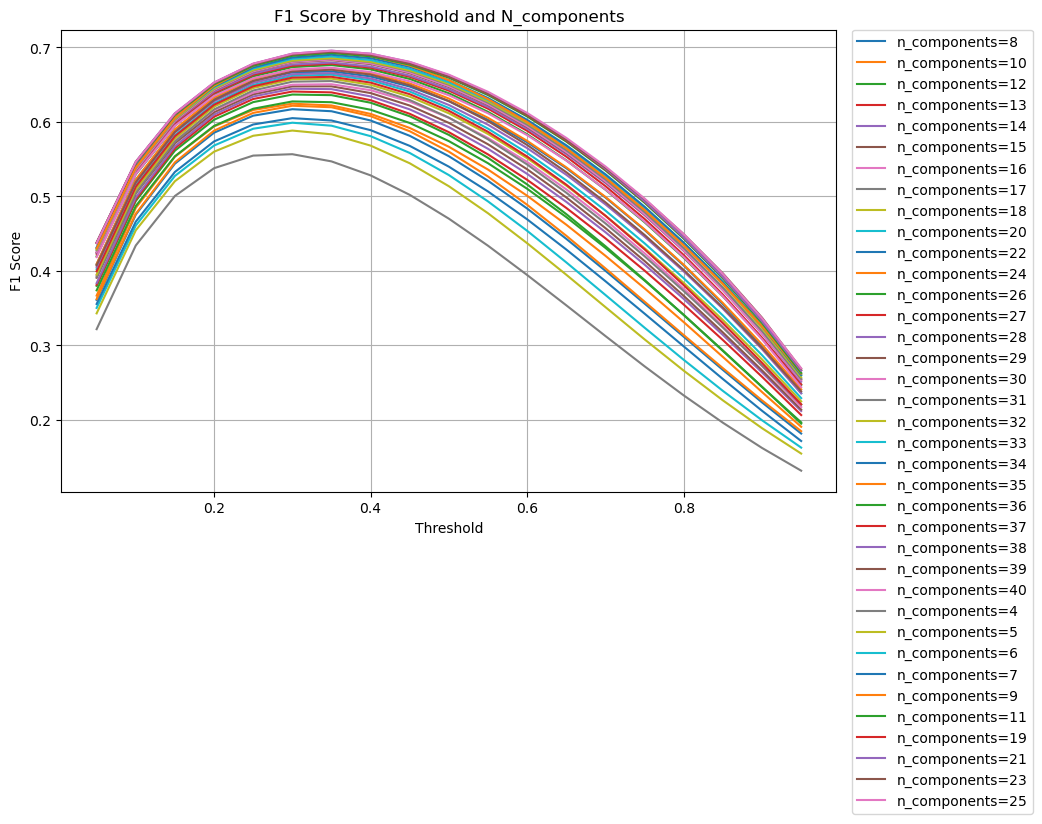

In [42]:
with open(results_filename, 'rb') as f:
    loaded_results = pickle.load(f)

plt.figure(figsize=(10, 6))
for n, dataframes in loaded_results.items():
    df = dataframes[1]
    df['precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['recall'] = df['TP'] / (df['TP'] + df['FN'])
    df['F1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
    df['F1'].fillna(0, inplace=True)  # Fill NaN values with 0 (when both precision and recall are 0)
    plt.plot(df['threshold'], df['F1'], label=f'n_components={n}')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score by Threshold and N_components')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.grid()
plt.show()

In [43]:
with open(results_filename, 'rb') as f:
    loaded_results = pickle.load(f)

loaded_results = dict(sorted(loaded_results.items()))

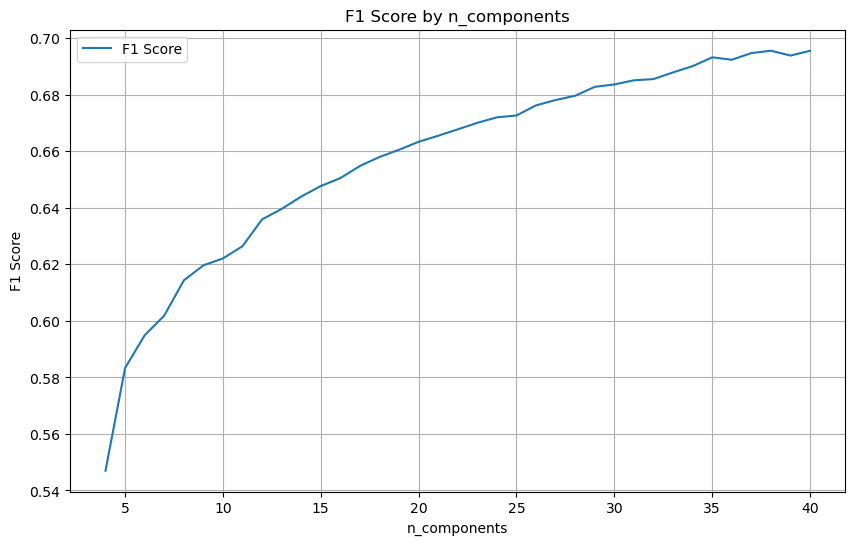

In [44]:
from sklearn.metrics import auc

n_values = []
auprc_values = []
f1_scores = []
threshold = 0.35

for n, dataframes in loaded_results.items():
    df = dataframes[1].copy()
    df = df[df['threshold'] <= threshold]  # Select rows up to the given threshold
    df['precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['recall'] = df['TP'] / (df['TP'] + df['FN'])
    df['F1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
    df['F1'].fillna(0, inplace=True)  # Fill NaN values with 0 (when both precision and recall are 0)
    f1_score = df.loc[df['threshold'] == threshold, 'F1'].values[0]  # F1 score at the given threshold

    n_values.append(n)
    f1_scores.append(f1_score)


plt.figure(figsize=(10, 6))
plt.plot(n_values, f1_scores, label='F1 Score')
plt.xlabel('n_components')
plt.ylabel('F1 Score')
plt.title('F1 Score by n_components')
plt.legend()
plt.grid()
plt.show()



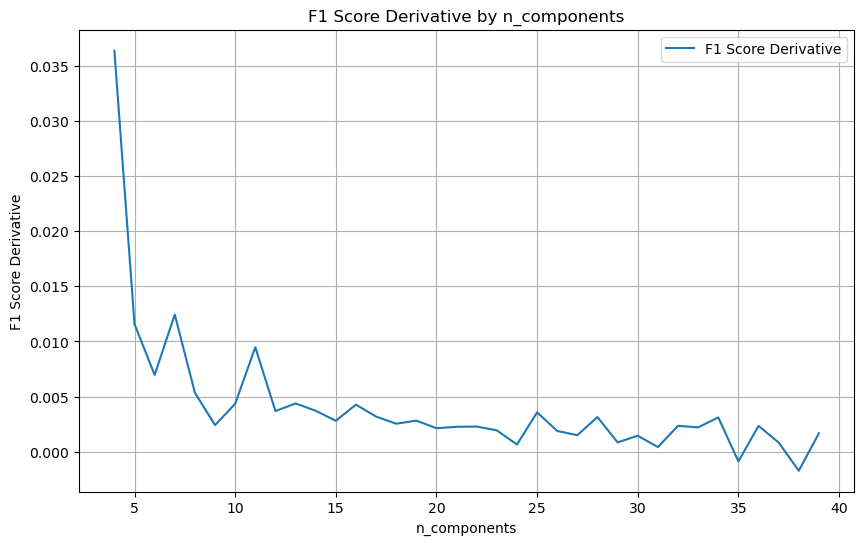

In [45]:
n_values = []
auprc_values = []
f1_scores = []
threshold = 0.35

for n, dataframes in loaded_results.items():
    df = dataframes[1].copy()
    df = df[df['threshold'] <= threshold]  # Select rows up to the given threshold
    df['precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['recall'] = df['TP'] / (df['TP'] + df['FN'])
    df['F1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
    df['F1'].fillna(0, inplace=True)  # Fill NaN values with 0 (when both precision and recall are 0)
    f1_score = df.loc[df['threshold'] == threshold, 'F1'].values[0]  # F1 score at the given threshold

    n_values.append(n)
    f1_scores.append(f1_score)

f1_derivatives = np.diff(f1_scores) / np.diff(n_values)

plt.figure(figsize=(10, 6))
plt.plot(n_values[:-1], f1_derivatives, label='F1 Score Derivative')
plt.xlabel('n_components')
plt.ylabel('F1 Score Derivative')
plt.title('F1 Score Derivative by n_components')
plt.legend()
plt.grid()
plt.show()

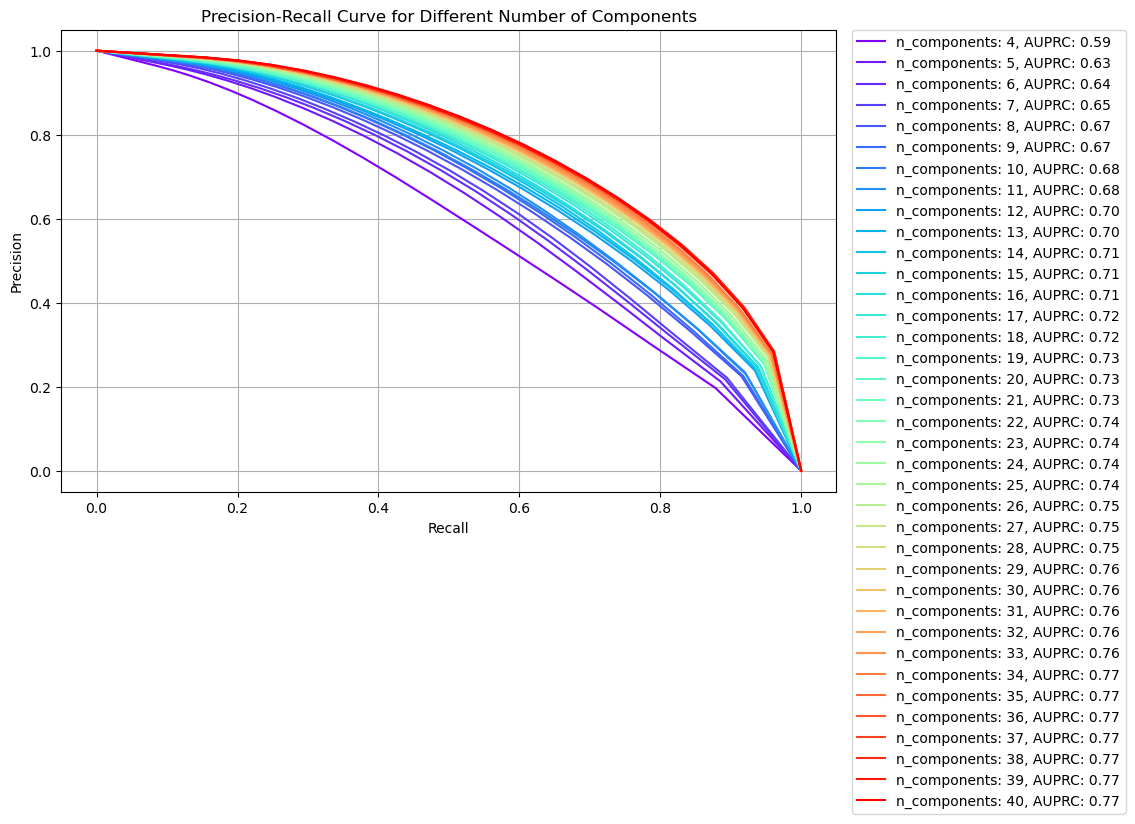

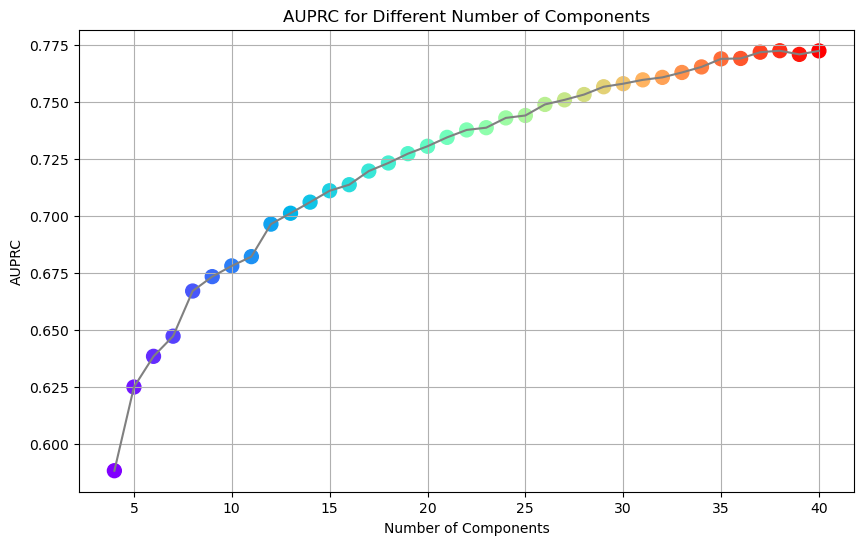

In [47]:
# Create a color map
colors = cm.rainbow(np.linspace(0, 1, len(loaded_results)))

plt.figure(figsize=(10, 6))

# Container for AUC scores
auprc_scores = []

# For each number of components, calculate and plot PRC
for (n, dataframes), color in zip(loaded_results.items(), colors):
    df = dataframes[1].copy()
    
    df['precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['recall'] = df['TP'] / (df['TP'] + df['FN'])

    precision_values = df['precision'].values
    recall_values = df['recall'].values

    # Add points (0, 1) and (1, 0)
    precision_values = np.insert(precision_values, 0, 1)
    recall_values = np.insert(recall_values, 0, 0)
    precision_values = np.append(precision_values, 0)
    recall_values = np.append(recall_values, 1)

    # Sort recall and corresponding precision values in ascending order
    sort_indices = np.argsort(recall_values)
    recall_values = recall_values[sort_indices]
    precision_values = precision_values[sort_indices]

    # Calculate area under the curve
    area = auc(recall_values, precision_values)
    auprc_scores.append((n, area))
    
    plt.plot(recall_values, precision_values, color=color, label=f'n_components: {n}, AUPRC: {area:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Number of Components')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.grid()
plt.show()

# Plotting AUPRC scores
n_components, scores = zip(*auprc_scores)

plt.figure(figsize=(10, 6))
plt.scatter(n_components, scores, c=colors, s=100)
plt.plot(n_components, scores, linestyle='-', color='grey')
plt.xlabel('Number of Components')
plt.ylabel('AUPRC')
plt.title('AUPRC for Different Number of Components')
plt.grid()
plt.show()


# F1 & MCC for (4501 or 3883 )* 1.8M matrix, not downsampled

In [53]:
# for 1.8M  not downsampled

bin_3883_18M = np.load("/net/seq/data2/projects/sabramov/SuperIndex/clean_index_clustering/dnase_3883/output/binary.only_autosomes.filtered.matrix.npy")
bin_4501_18M = np.load("/net/seq/data2/projects/aabisheva/Encode/input_matrixes/filtered.4501_bin_18M_peaks.npy")
base_matrix_set = [bin_4501_18M, bin_3883_18M]

prefix_range = ["bin_4501_index_not_downs_18_peaks", "bin_3883_index_not_downs_18_peaks"]
# just keep in mind, that they are W_new, H_new and in another dir and saved with old prefix:
prefix_range_old = ["bin_4501_index_not_downs_760_peaks", "bin_3883_index_not_downs_760_peaks"]

save_dir = "/net/seq/data2/projects/aabisheva/Encode/nextflow_results/nmf_results/reprojection_4501_results/"


In [ ]:
NC_ar = list(range(4, 41))  

for prefix_set, base_matrix in zip(prefix_range, base_matrix_set):
    results_filename = os.path.join(output_dir_scores, f'{prefix_set}.pkl')
    if not os.path.isfile(results_filename):
        with open(results_filename, 'wb') as f:
            pickle.dump({}, f)

    with open(results_filename, 'rb') as f:
        results = pickle.load(f)

    missing_components = []

    for n_components in NC_ar:
        # Skip calculation if results are already available
        if n_components in results:
            print(f"Results for N_components: {n_components} already available.")
            continue

        print("SET: ", prefix_set, ", N_components: ", n_components)
        prefix = prefix_set + '.'+ str(n_components)
        
        # patch for that weird saving
        if prefix_set ==  prefix_range[0]:
            prefix_old = prefix_range_old[0]
        if prefix_set ==  prefix_range[1]:
            prefix_old = prefix_range_old[1]
        
        W_save_path = save_dir + prefix_old + '.'+ str(n_components) + ".W_new.npy"
        H_save_path = save_dir + prefix_old + '.'+ str(n_components) + ".H_new.npy"

        if not (os.path.isfile(W_save_path) and os.path.isfile(H_save_path)):
            print(f"No files found for N_components: {n_components}")
            missing_components.append(n_components)
            print(W_save_path)
            continue

        decomp = OONMF.NMFobject(n_components)
        decomp.matrix_input_name(W_save_path, 
                                 H_save_path)
        decomp.read_matrix_input(compressed=False)
        print(decomp.Basis.shape, decomp.Mixture.shape, "matrixes loaded for n_components", n_components)

        df = decomp.precision_recall_curve(base_matrix.T)
        results[n_components] = df

    # Save the updated results
    with open(results_filename, 'wb') as f:
        pickle.dump(results, f)

    print(f"Missing N_components: {missing_components}")

SET:  bin_4501_index_not_downs_18_peaks , N_components:  4
(4501, 4) (4, 1772171) matrixes loaded for n_components 4
SET:  bin_4501_index_not_downs_18_peaks , N_components:  5
(4501, 5) (5, 1772171) matrixes loaded for n_components 5
SET:  bin_4501_index_not_downs_18_peaks , N_components:  6
(4501, 6) (6, 1772171) matrixes loaded for n_components 6
SET:  bin_4501_index_not_downs_18_peaks , N_components:  7
(4501, 7) (7, 1772171) matrixes loaded for n_components 7
